# ML/ Image Quality Detector
> A CONVOLUTIONAL NEURON is a special type of neuron used in image, video and other type of processing which applies CONVOLUTION to it's input data

> Convolutional is a mathematical way to combine multiple input signals in one output signal

## HOW it works?
<img src="./images/img1.jpg" style="width:900px;height 900px"/>

V = x0*w0+x1*w1+...xN*wN

<img src="./images/img0.png" style="width:500px;height 500px"/>

<br><img src="./images/img2.gif" style="width:500px;height 500px"/>
<br><img src="./images/img3.gif" style="width:500px;height 500px"/>

### Filter can see like a specific type of shape
<img src="./images/img4.jpeg" style="width:900px;height 900px"/>



In [28]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import torch, torch.nn as nn
import numpy as np


IMAGE = "Images/img.jpg"


## Load and plot image

[[230 230 230 ... 216 216 216]
 [230 230 230 ... 216 216 216]
 [230 230 230 ... 215 216 216]
 ...
 [ 72  76  74 ...  74  73  71]
 [ 70  72  70 ...  71  70  70]
 [ 70  70  68 ...  69  69  68]]


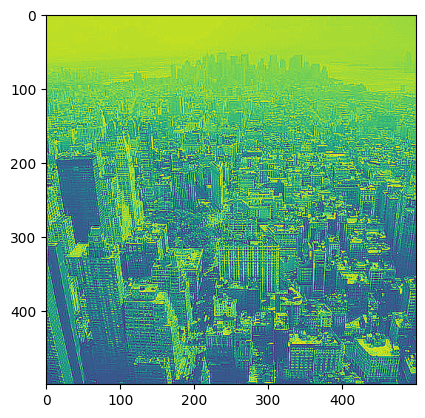

In [29]:
img = Image.open(IMAGE)
img_gray= ImageOps.grayscale(img)
img_gray_matrix= np.array(img_gray)
plt.imshow(img_gray_matrix)
print(img_gray_matrix)
# RGB [128,200,255]
# GRAY[100]

In [33]:
# Create a Convolutiopnal Layer(Neuron)
#
# layer
cnn = nn.Conv2d(in_channels=1,out_channels=1,kernel_size=(7,7))

weight = torch.tensor([[[
    [1.,0.,0.,0.,0.,0.,],
    [0.,1.,0.,0.,0.,1.,],
    [0.,0.,1.,0.,1.,0.,],
    [0.,0.,0.,1.,0.,0.,],
    [0.,0.,1.,0.,1.,0.,],
    [0.,1.,0.,0.,0.,1.,],
    [1.,0.,0.,0.,0.,0.,]
                      ]]])
cnn.weight = nn.Parameter(weight)

print(cnn.weight)
print("ORIGINAL IMAGE SIZE:", img_gray_matrix.shape)# <-- no array object
print("CNN 2D KERNEL SIZE:",cnn.weight.shape)       # <-- tourch tensor object


Parameter containing:
tensor([[[[1., 0., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0., 1.],
          [0., 0., 1., 0., 1., 0.],
          [0., 0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 1., 0.],
          [0., 1., 0., 0., 0., 1.],
          [1., 0., 0., 0., 0., 0.]]]], requires_grad=True)
ORIGINAL IMAGE SIZE: (500, 500)
CNN 2D KERNEL SIZE: torch.Size([1, 1, 7, 6])


# Let's pass the image trougth Neuron

torch.Size([1, 500, 500])
torch.Size([1, 494, 495])
tensor([[[1610.0447, 1610.0447, 1610.0447,  ..., 1519.0447, 1519.0447,
          1519.0447],
         [1610.0447, 1610.0447, 1610.0447,  ..., 1519.0447, 1519.0447,
          1519.0447],
         [1610.0447, 1610.0447, 1610.0447,  ..., 1517.0447, 1518.0447,
          1522.0447],
         ...,
         [ 487.0446,  496.0446,  500.0446,  ...,  529.0446,  481.0446,
           503.0446],
         [ 482.0446,  498.0446,  502.0446,  ...,  506.0446,  481.0446,
           516.0446],
         [ 490.0446,  505.0446,  501.0446,  ...,  489.0446,  467.0446,
           517.0446]]])


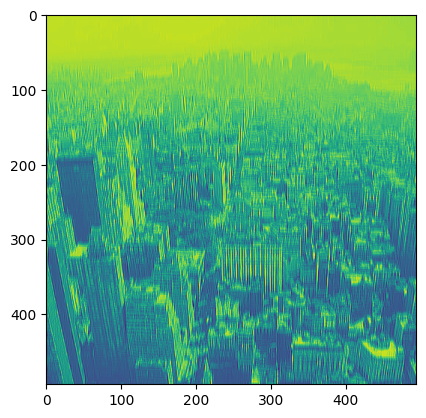

In [32]:
# !Imput must be a TENSOR!
input_tensor = torch.from_numpy(img_gray_matrix)
input_tensor = input_tensor.type(torch.FloatTensor)
input_tensor = input_tensor.view(1,500,500)
print(input_tensor.shape)
output_tensor= input_tensor
for i in range(1):
    output_tensor = cnn(output_tensor)
print (output_tensor.shape)
print(output_tensor.detach())
plt.imshow(output_tensor.detach().numpy()[0])


# Conclusion 
* Convolution is a simple mathematical operation wich is fundamental to many common image procesing operation
* Convolution helps the neuronal Network " see the features" of image
* The bigger the filter, the more "advanced features" it sees
* A CNN is capable of changing (adapting) it's filtering capabilities - hence TO Learn a "specific feature"